In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## Cleaning Dataset

In [325]:
# Load the dataset

df_main = pd.read_csv('./Leads.csv')

In [326]:
df_main.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [327]:
# Print the information about the dataframe

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [328]:
# Print the statistical summary of the dataframe

df_main.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking missing values

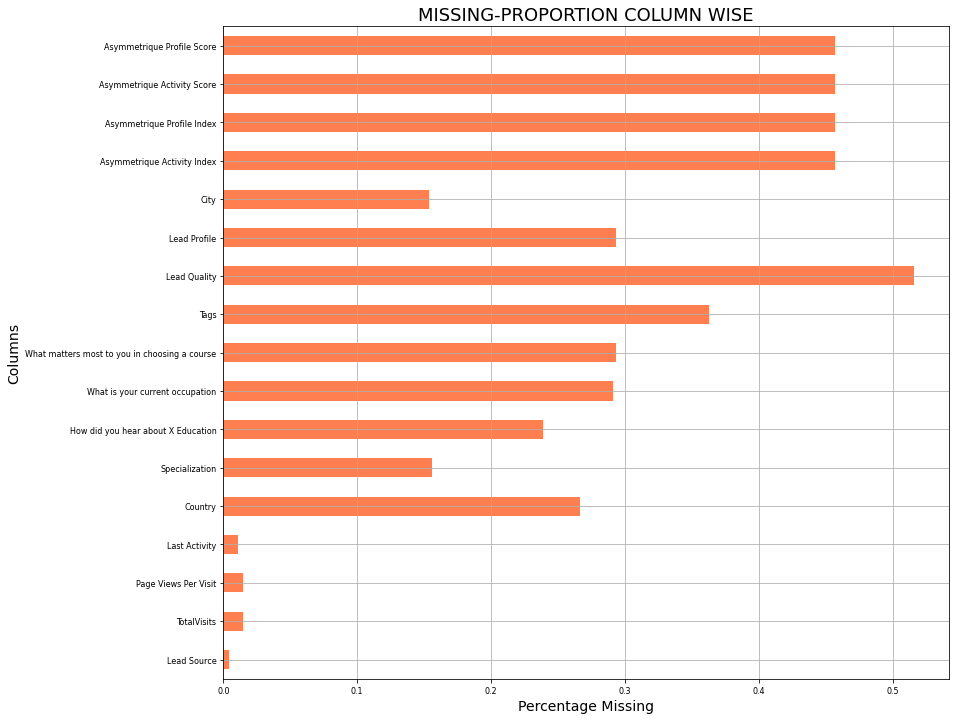

Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Asymmetrique Activity Index                      0.456494
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
Lead Profile                                     0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Do Not Email  

In [329]:
# Check which columns have na/null values.
# Percentage of the total values missing for each column in the application csv
# Plot a bar graph to represent missing values percent per column

per_missing = df_main.isna().sum(axis = 0)/df_main.shape[0]
ax = per_missing[~(per_missing==0)].plot(kind='barh', figsize=(13,12),
                                        color="coral", fontsize=8, grid=True)
ax.set_title("MISSING-PROPORTION COLUMN WISE", fontsize=18)
ax.set_xlabel("Percentage Missing", fontsize=14)
ax.set_ylabel("Columns", fontsize=14)
plt.show()
print(per_missing.sort_values(ascending=False))

Looking at the above plot, we make the following statements 

* Lead Quality : the number of data points with missing are 51.5909%
* Asymmetric Activity index, Activity Score, Profile index and Profile Score - missing data points are 45.64%
* Tags - missing values are 36.2%

The above numbers are quite large and cannot be ignored. But the total number of datapoints that we have, are also quite small i.e. 9240, so dropping the columns also needs a consideration, whether the column holds important information and can the values in the column be imputed.

**The attributes Lead quality, Assymetric Activity index, activity score, profile index and profile score are important factors and have alot of missing values, so very first observation here would be that the data collection itself is patchy process with the organisation. The relevant attributes should be captured without failure. Dropping these columns for now**


In [330]:
# Dropping the above mentioned columns
drop_cols =  ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
              'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Tags', 'Lead Quality']

df_main.drop(drop_cols, axis=1, inplace=True)

In [331]:
df_main.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


### Data Type Check

In [332]:
df_main.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [333]:
# Whethere the each of the element for each of the column has consistent data type w.r.t the defined datatype for the column.

list_n_datatype = [1 if (np.array_equal(df_main[f"{col}"], 
                   df_main[f"{col}"].astype(df_main[col].dtype))) else 0 
                   for col in df_main.columns]

# List stores [1, 0, ...] where 1 means the datatype matches for each of the element for the column 
# with defined datatype else 0

# Check if the sum of the list_n_datatype == len(list_n_datatype) -> all datatypes are consistent

if sum(list_n_datatype) == len(list_n_datatype):
    print('All datatypes are consistent with the values in the column')
else:
    dtype_list_f = [ df_main.columns[idx] for idx, val in enumerate(list_n_datatype) if val==0 ]
    print('The columns with dtype mismatch : ')
    print()
    print(dtype_list_f)

The columns with dtype mismatch : 

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City']


In [334]:
# Check where is the mismatch
lookup_dict = {'object' : str, 'int64' : int, 'float64' : float}
miss_match = [str(ele) for col in dtype_list_f for ele in df_main[col] if not type(ele) == lookup_dict[df_main[col].dtype.name]]

# Check whether all the dtype mismatch values are nan
arr = np.array(miss_match)
if np.all(arr == arr[0]):
    print('All the miss match values are nan values')
else:
    print('The mismatch values are different from nan')

All the miss match values are nan values


The above statement proves that there is no data mismatch to be found, rather all the mismatch values are NaN values.

### Impute NaN values

In [335]:
# Imputed the categorical variables with mode and continuous variables with mean

def impute_func(df, cols):
    for col in cols:
        if df[col].dtype.name == 'object':
            print(f'Null values : {df[col].isnull().sum()}')
            print(f'Imputing {col} with dtype {df[col].dtype.name} using mode')
            print(f'mode : {df[col].mode()}')
            df[col] = df[col].fillna(df[col].mode())
            print(f'Null values : {df[col].isnull().sum()}')
            print()
        if df[col].dtype.name == ('float64' or 'int64'):
            print(f'Null values : {df[col].isnull().sum()}')
            print(f'Imputing {col} with dtype {df[col].dtype.name} using mean')
            print(f'mode : {df[col].mean()}')
            df[col] = df[col].fillna(df[col].mean())
            print(f'Null values : {df[col].isnull().sum()}')
            print()
        if df[col].dtype.name == 'category':
            print(f'Null values : {df[col].isnull().sum()}')
            print(f'Imputing {col} with dtype {df[col].dtype.name} using mode')
            print(f'mode : {df[col].mode()}')
            df[col] = df[col].fillna(df[col].mode()[0])
            print(f'Null values : {df[col].isnull().sum()}')
            print()
        

Let's try to impute the values for the columns
* What matters most to you in choosing a course  
* Lead Profile                                     
* What is your current occupation                  
* Country                                          
* How did you hear about X Education               
* Specialization                                   
* City                                             
* TotalVisits                                      
* Page Views Per Visit                             
* Last Activity                                    
* Lead Source                                      

In [336]:
# Call the impute function over each column and check which attribute(mean, median and mode) which best fits the model.
print(dtype_list_f)
impute_func(df_main, dtype_list_f)

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City']
Null values : 36
Imputing Lead Source with dtype object using mode
mode : 0    Google
dtype: object
Null values : 36

Null values : 137
Imputing TotalVisits with dtype float64 using mean
mode : 3.445237833681204
Null values : 0

Null values : 137
Imputing Page Views Per Visit with dtype float64 using mean
mode : 2.3628199494672084
Null values : 0

Null values : 103
Imputing Last Activity with dtype object using mode
mode : 0    Email Opened
dtype: object
Null values : 103

Null values : 2461
Imputing Country with dtype object using mode
mode : 0    India
dtype: object
Null values : 2460

Null values : 1438
Imputing Specialization with dtype object using mode
mode : 0    Select
dtype: object
Null values : 1438

Null values : 2207
Imputing How d

* We observe that the numeric columns have been imputed with the mean but the categorical variables are not  imputed, reason being the column value are in string class names, let's convert the classes to numeric values.

* We first need to see, which columns in the object dtype are categorical variable and which columns are just string entry columns.Let's figure that out!


In [337]:
# Let's first look at all the columns which are object type 
# Segregate the columns into categorical and string entry.


obj_cols = [col for col in df_main.columns if df_main[col].dtype.name == 'object']
print(obj_cols)
print()
impute_cols = ['What matters most to you in choosing a course', 'Lead Profile', 
               'What is your current occupation', 'Country', 'How did you hear about X Education', 
               'Specialization', 'City', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 
               'Lead Source']

intersec_cols = set(obj_cols).intersection(set(impute_cols))
print("Categorical and Impute Required Columns : ")
print()
print(intersec_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

Categorical and Impute Required Columns : 

{'Country', 'What matters most to you in choosing a course', 'How did you hear about X Education', 'Lead Source', 'What is your current occupation', 'City', 'Lead Profile', 'Last Activity', 'Specialization'}


Looking at the above columns to decide which ones are categorical and which ones are free text columns

* Country - Self evidential - Categorical

* How did you hear about X Education, Unique values : 
{'Select', 'Word Of Mouth', 'Other', nan, 'Online Search', 'Multiple Sources',      'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media', 'SMS'} ---> Categorical Variable
 

* Specialization : Unique values
{'Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'} -> Categorical Variable

* Last Activity : Unique Values : 
{'Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'} -> Categorical variable

* Lead Profile : Unique Values
{'Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'} -> Categorical Variable

* Lead Source : Unique Values
{'Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'} -> Categorical Variable

* What matters most to you in choosing a course : Unique Values 
{'Better Career Prospects', nan, 'Flexibility & Convenience', 'Other'} -> Categorical Variable

* What is your current occupation : 
{'Unemployed', 'Student', nan, 'Working Professional', 'Businessman', 'Other', 'Housewife'} -> Categorical Variable

* City : Unique Values 
{'Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities', 'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'} -> Categorical Variable



All the above mentioned columns are categorical only.

**The select is a value in a column which unanswered by the customer, equivalent to nan. It needs to be cleaned**
      

In [338]:
#Cheking the list of columns that need to be converted to categorical and have to be imputed
intersec_cols 

{'City',
 'Country',
 'How did you hear about X Education',
 'Last Activity',
 'Lead Profile',
 'Lead Source',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course'}

In [339]:
#checking the NAN values in the above columns
df_main[intersec_cols].isna().sum()

Country                                          2460
What matters most to you in choosing a course    2709
How did you hear about X Education               2207
Lead Source                                        36
What is your current occupation                  2690
City                                             1420
Lead Profile                                     2709
Last Activity                                     103
Specialization                                   1438
dtype: int64

In [340]:
# Finding out how many columns has the category 'Select' in them
print("Column name containing value Select:\n")
for col in intersec_cols:
    for value in df_main[col].values:
        if value == "Select":
            print(col)
            break

Column name containing value Select:

How did you hear about X Education
City
Lead Profile
Specialization


In [341]:
#Testing for 'Select' Values, NaN Values in the columns
def select_count(df,cols):
    for col in cols:
        print(col)
        print('    Select Values Count',(df[col]=='Select').sum())
        print('    NAN values',(df[col].isna()).sum())
select_count(df_main,intersec_cols)

Country
    Select Values Count 0
    NAN values 2460
What matters most to you in choosing a course
    Select Values Count 0
    NAN values 2709
How did you hear about X Education
    Select Values Count 5043
    NAN values 2207
Lead Source
    Select Values Count 0
    NAN values 36
What is your current occupation
    Select Values Count 0
    NAN values 2690
City
    Select Values Count 2249
    NAN values 1420
Lead Profile
    Select Values Count 4146
    NAN values 2709
Last Activity
    Select Values Count 0
    NAN values 103
Specialization
    Select Values Count 1942
    NAN values 1438


As per above values of select and NAN values, we should get the following count after converting Select to NAN
* City: 2249+1420=3669
* How did you hear about X Education 5043+2207=7250
* Specialization 1942+1438=3380
* Lead Profile 4146+2709=6855

In [342]:
# Replacing the select with NAN
def replace_select(df,cols):
    for col in cols:
        df[col].replace('Select',np.NaN,inplace=True)

In [343]:
#Calling the function to replace select values with NAN
replace_select(df_main, intersec_cols)

In [344]:
df_main[intersec_cols].isna().sum()

Country                                          2460
What matters most to you in choosing a course    2709
How did you hear about X Education               7250
Lead Source                                        36
What is your current occupation                  2690
City                                             3669
Lead Profile                                     6855
Last Activity                                     103
Specialization                                   3380
dtype: int64

Above NAN values are as per what we expected. Now converting these columns to categorical and imputing the NaN Values with Mode. 

In [345]:
#Converting the columns into categorical columns
def categorical_convert(df,cols):
    for col in cols:
        df[col]=df[col].astype('category')

In [346]:
# Converting the intersection columns to categorical
categorical_convert(df_main,intersec_cols)

In [347]:
# Checking the info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    9240 non-null   object  
 1   Lead Number                                    9240 non-null   int64   
 2   Lead Origin                                    9240 non-null   object  
 3   Lead Source                                    9204 non-null   category
 4   Do Not Email                                   9240 non-null   object  
 5   Do Not Call                                    9240 non-null   object  
 6   Converted                                      9240 non-null   int64   
 7   TotalVisits                                    9240 non-null   float64 
 8   Total Time Spent on Website                    9240 non-null   int64   
 9   Page Views Per Visit                     

In [348]:
impute_func(df_main,intersec_cols)

Null values : 2460
Imputing Country with dtype category using mode
mode : 0    India
Name: Country, dtype: category
Categories (38, object): ['Asia/Pacific Region', 'Australia', 'Bahrain', 'Bangladesh', ..., 'United Kingdom', 'United States', 'Vietnam', 'unknown']
Null values : 0

Null values : 2709
Imputing What matters most to you in choosing a course with dtype category using mode
mode : 0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: category
Categories (3, object): ['Better Career Prospects', 'Flexibility & Convenience', 'Other']
Null values : 0

Null values : 7250
Imputing How did you hear about X Education with dtype category using mode
mode : 0    Online Search
Name: How did you hear about X Education, dtype: category
Categories (9, object): ['Advertisements', 'Email', 'Multiple Sources', 'Online Search', ..., 'SMS', 'Social Media', 'Student of SomeSchool', 'Word Of Mouth']
Null values : 0

Null values : 36
Imputing Lead Source with dtyp

 The columns ('City', 'Country', 'How did you hear about X Education', 'Last Activity', 'Lead Profile', 'Lead Source', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course') have been imputed with the mode values of the respecting columns

In [349]:
#Checking the missing values
per_missing = df_main.isna().sum(axis = 0)/df_main.shape[0]
per_missing

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [350]:
# Check for nan values too for all the columns just to make sure no more nan exists.
df_main.isnull().values.any()

False

**There are no missing values in the dataframe.**

## Exploratory Data Analysis

### Analysis -> Negative Class = Leads Not turning into Customer

In [351]:
df_neg = df_main[df_main['Converted'] == 0]
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5679 entries, 0 to 9237
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    5679 non-null   object  
 1   Lead Number                                    5679 non-null   int64   
 2   Lead Origin                                    5679 non-null   object  
 3   Lead Source                                    5679 non-null   category
 4   Do Not Email                                   5679 non-null   object  
 5   Do Not Call                                    5679 non-null   object  
 6   Converted                                      5679 non-null   int64   
 7   TotalVisits                                    5679 non-null   float64 
 8   Total Time Spent on Website                    5679 non-null   int64   
 9   Page Views Per Visit                     

In [352]:
# Split the columns into numeric and categorical variables
# Remove the Prospect ID, Lead Number and Converted columns from the categorical and numeric variable.

categ_neg_cols = [col for col in df_neg if df_neg[col].dtype.name in ['object', 'category']]
categ_neg_cols.remove('Prospect ID')
num_neg_cols = [col for col in df_neg if df_neg[col].dtype.name in ['int64', 'float64']]
num_neg_cols.remove('Converted')
num_neg_cols.remove('Lead Number')

### Frequency plot Categorical Variables

In [353]:
def plot_categ(nrows, ncols, df, categ_cols, figsize):

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    index = 0
    if nrows > 1:
        for row in range(nrows):
            for col in range(ncols):
                if index < len(categ_cols):
                    r = random.random()
                    b = random.random()
                    g = random.random()
                    y = [val for key, val in df[categ_cols[index]].value_counts().iteritems()]
                    x = [n for n in range(len(y))]
                    ax[row][col].bar(x, y, color=(r,g,b)) 
                    ax[row][col].set_xlabel('Categories', fontsize=12)
                    ax[row][col].set_ylabel('Frequency', fontsize=12)
                    ax[row][col].set_title(f'{categ_cols[index]} - Class Frequency Plot')
                    plt.sca(ax[row][col])
                    plt.xticks(range(len(x)), [key for key, val in df[categ_cols[index]].value_counts().iteritems()],rotation=90)
                    ax[row][col].grid()
                else :
                    ax[row, col].axis('off')

                index +=1
    else:
        for row in range(nrows):
            for col in range(ncols):
                if index < len(categ_cols):
                    r = random.random()
                    b = random.random()
                    g = random.random()
                    y = [val for key, val in df[categ_cols[index]].value_counts().iteritems()]
                    x = [n for n in range(len(y))]
                    ax[col].bar(x, y, color=(r,g,b)) 
                    ax[col].set_xlabel('Categories', fontsize=12)
                    ax[col].set_ylabel('Frequency', fontsize=12)
                    ax[col].set_title(f'{categ_cols[index]} - Class Frequency Plot')
                    plt.sca(ax[col])
                    plt.xticks(range(len(x)), [key for key, val in df[categ_cols[index]].value_counts().iteritems()],rotation=90)
                    ax[col].grid()
                else :
                    ax[col].axis('off')

                index +=1
        

    fig.tight_layout()
    plt.show()

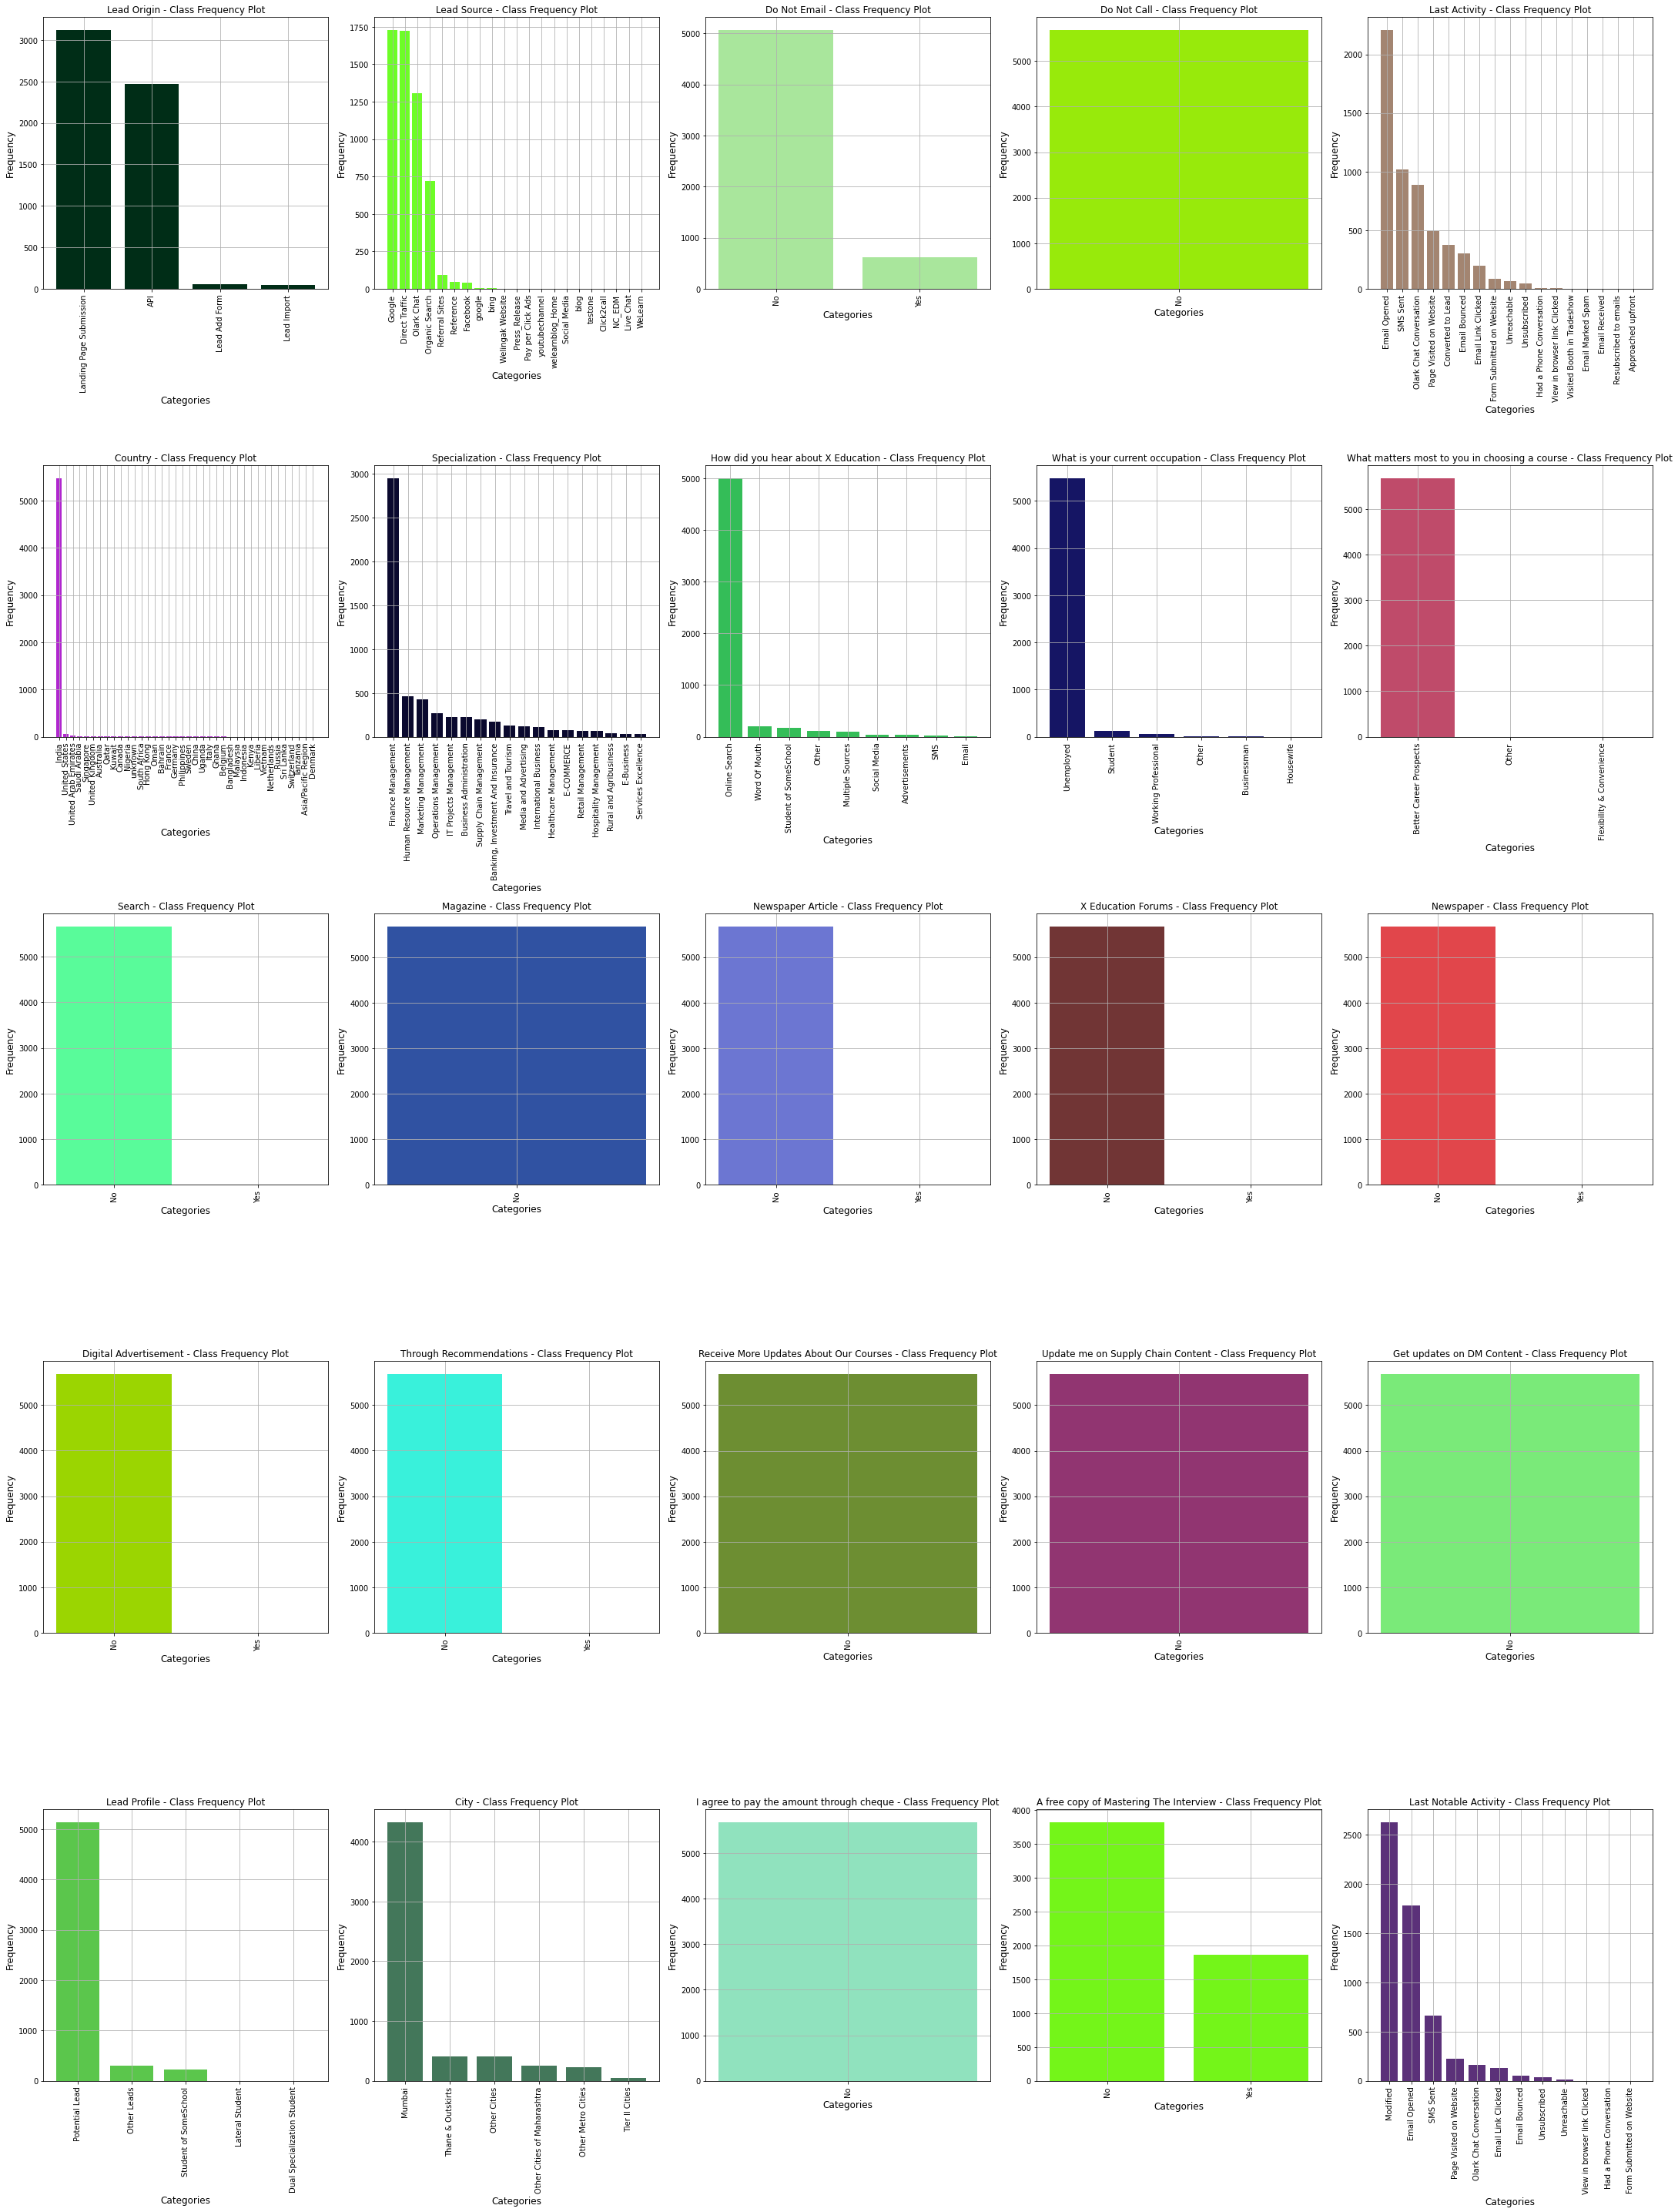

In [354]:
# Plot the
# Rotate the ticks.
fig_size = (30, 40)
nrows = 5
ncols = 5
plot_categ(nrows, ncols, df_neg, categ_neg_cols, fig_size)

**Summary** 

* The most number of the negative lead subjects are from India i.e. more than 4000 data points.
* The **Lead Origin** of landing page submission has led to the most number of negative leads.
* The lead source from **Direct traffic** and **Google** are major source of the lead generation which ends up in the negative leads.
* The most of the negative leads are for the specialization in financial managment, then Human Resource Managment and then Marketing Management.
* We also see that most of the negative leads come are the ones which are not coming from recommendation.
* The most negtive leads come from the city Mumbai.
* The most of the negative leads heard about the X education from the online search only.
* The most of the negative leads are unemployed.
* The most of the negative leads do not want any interaction withe them in terms of email, call, update on DMs, newspaper of digital advertisement.
* **Interestingly, the negative leads are looking for better prospects in the career when asked about what matters to you in the course, which shouldn't be the case if the courses provided by X education has better prospects**.

### Histogram Plot Categorical Variables

In [355]:
def plot_hist(nrows, ncols, df, list_cols, fig_size):
    
    fig, ax = plt.subplots(nrows, ncols, figsize=fig_size)
    index = 0
    for j, col in enumerate(list_cols):
        if index < len(list_cols):
            tup_color = [random.random() for x in range(3)]
            df.hist(column=col, bins=100, ax=ax[j], alpha=0.5, color=tup_color)
            ax[j].set_title(f"Histogram - {col}", fontsize=18)
            ax[j].set_xlabel("Attribute Values - Bins", fontsize=12)
            ax[j].set_ylabel("Frequency", fontsize=12)
        else:
            ax[j].axis('off')
        index +=1
        

    plt.tight_layout()
    plt.show()

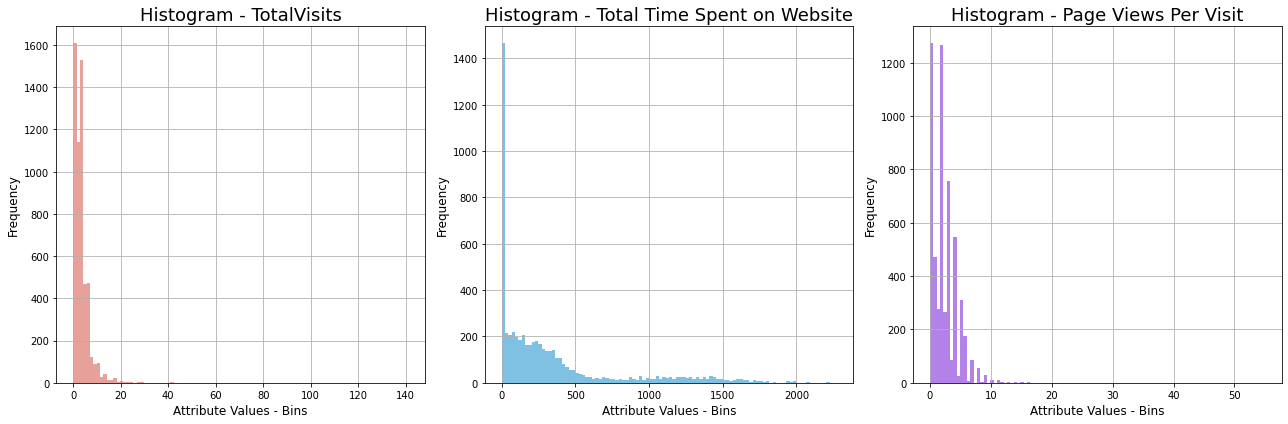

In [356]:
fig_size = (18, 6)
nrows = 1
ncols = 3
plot_hist(nrows, ncols, df_neg, num_neg_cols, fig_size)

### Box plot - Numeric Columns

In [357]:
# Box plot for the numerical columns
# Normalize the numeric columns so that the values can be plotted on the same scale
def plot_box(df, list_cols, fig_size):
    
    plt.figure(figsize=fig_size)
    min_max_scaler = preprocessing.MinMaxScaler()
    df_numer = df[list_cols]
    x_scaled = min_max_scaler.fit_transform(df_numer)
    df_normalized = pd.DataFrame(x_scaled)
    df_normalized.columns = list_cols
    sns.boxplot(y="variable", x="value", data=pd.melt(df_normalized), orient='h')
    plt.xlabel('Normalized Value', fontsize=15)
    plt.ylabel('Features', fontsize=15)         
    plt.title('Box Plot Analysis - Numeric Columns', fontsize=20)
    plt.tight_layout()
    plt.show()

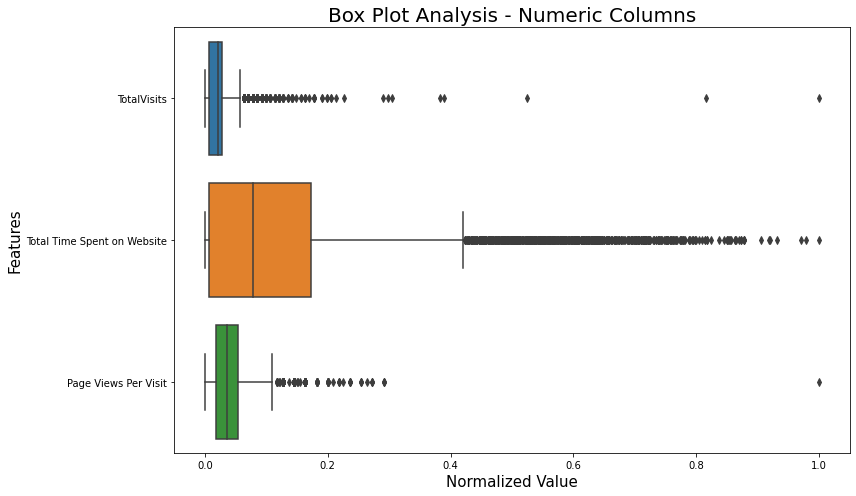

In [358]:
fig_size = (12, 7)
plot_box(df_neg, num_neg_cols, fig_size)

**Summarize**

* All three numeric variables have the outlier values and is right skewed distributions.
* Most of the total visits and Page views Per visit are spread in a very small range compared to the Total time spent on the website, which shows the negative leads are spending some good time on the website, but a good amount of time on specific pages.
* The long right tail for total time spent on website supports the above claim. 

### Bivariate Analysis
#### Pairwise Plot Numeric Variable

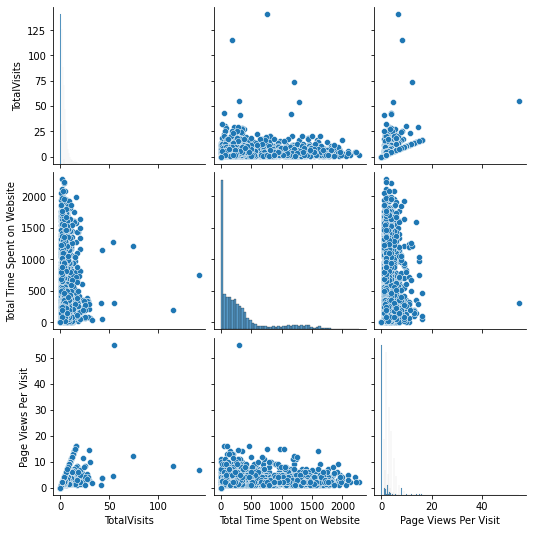

In [359]:
# Pairwise scatter plot for all the columns
sns.pairplot(df_neg[num_neg_cols])
plt.show()



**Summary**

* There is a small positive correlation between Page Views per Visit and total visits, which is pretty evident.

### Analysis -> Positive Class = Leads turning into Customer

In [360]:
df_pos = df_main[df_main['Converted'] == 1]
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 2 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    3561 non-null   object  
 1   Lead Number                                    3561 non-null   int64   
 2   Lead Origin                                    3561 non-null   object  
 3   Lead Source                                    3561 non-null   category
 4   Do Not Email                                   3561 non-null   object  
 5   Do Not Call                                    3561 non-null   object  
 6   Converted                                      3561 non-null   int64   
 7   TotalVisits                                    3561 non-null   float64 
 8   Total Time Spent on Website                    3561 non-null   int64   
 9   Page Views Per Visit                     

In [361]:
# Split the columns into numeric and categorical variables
# Remove the Prospect ID, Lead Number and Converted columns from the categorical and numeric variable.

categ_pos_cols = [col for col in df_pos if df_pos[col].dtype.name in ['object', 'category']]
categ_pos_cols.remove('Prospect ID')
num_pos_cols = [col for col in df_neg if df_pos[col].dtype.name in ['int64', 'float64']]
num_pos_cols.remove('Converted')
num_pos_cols.remove('Lead Number')

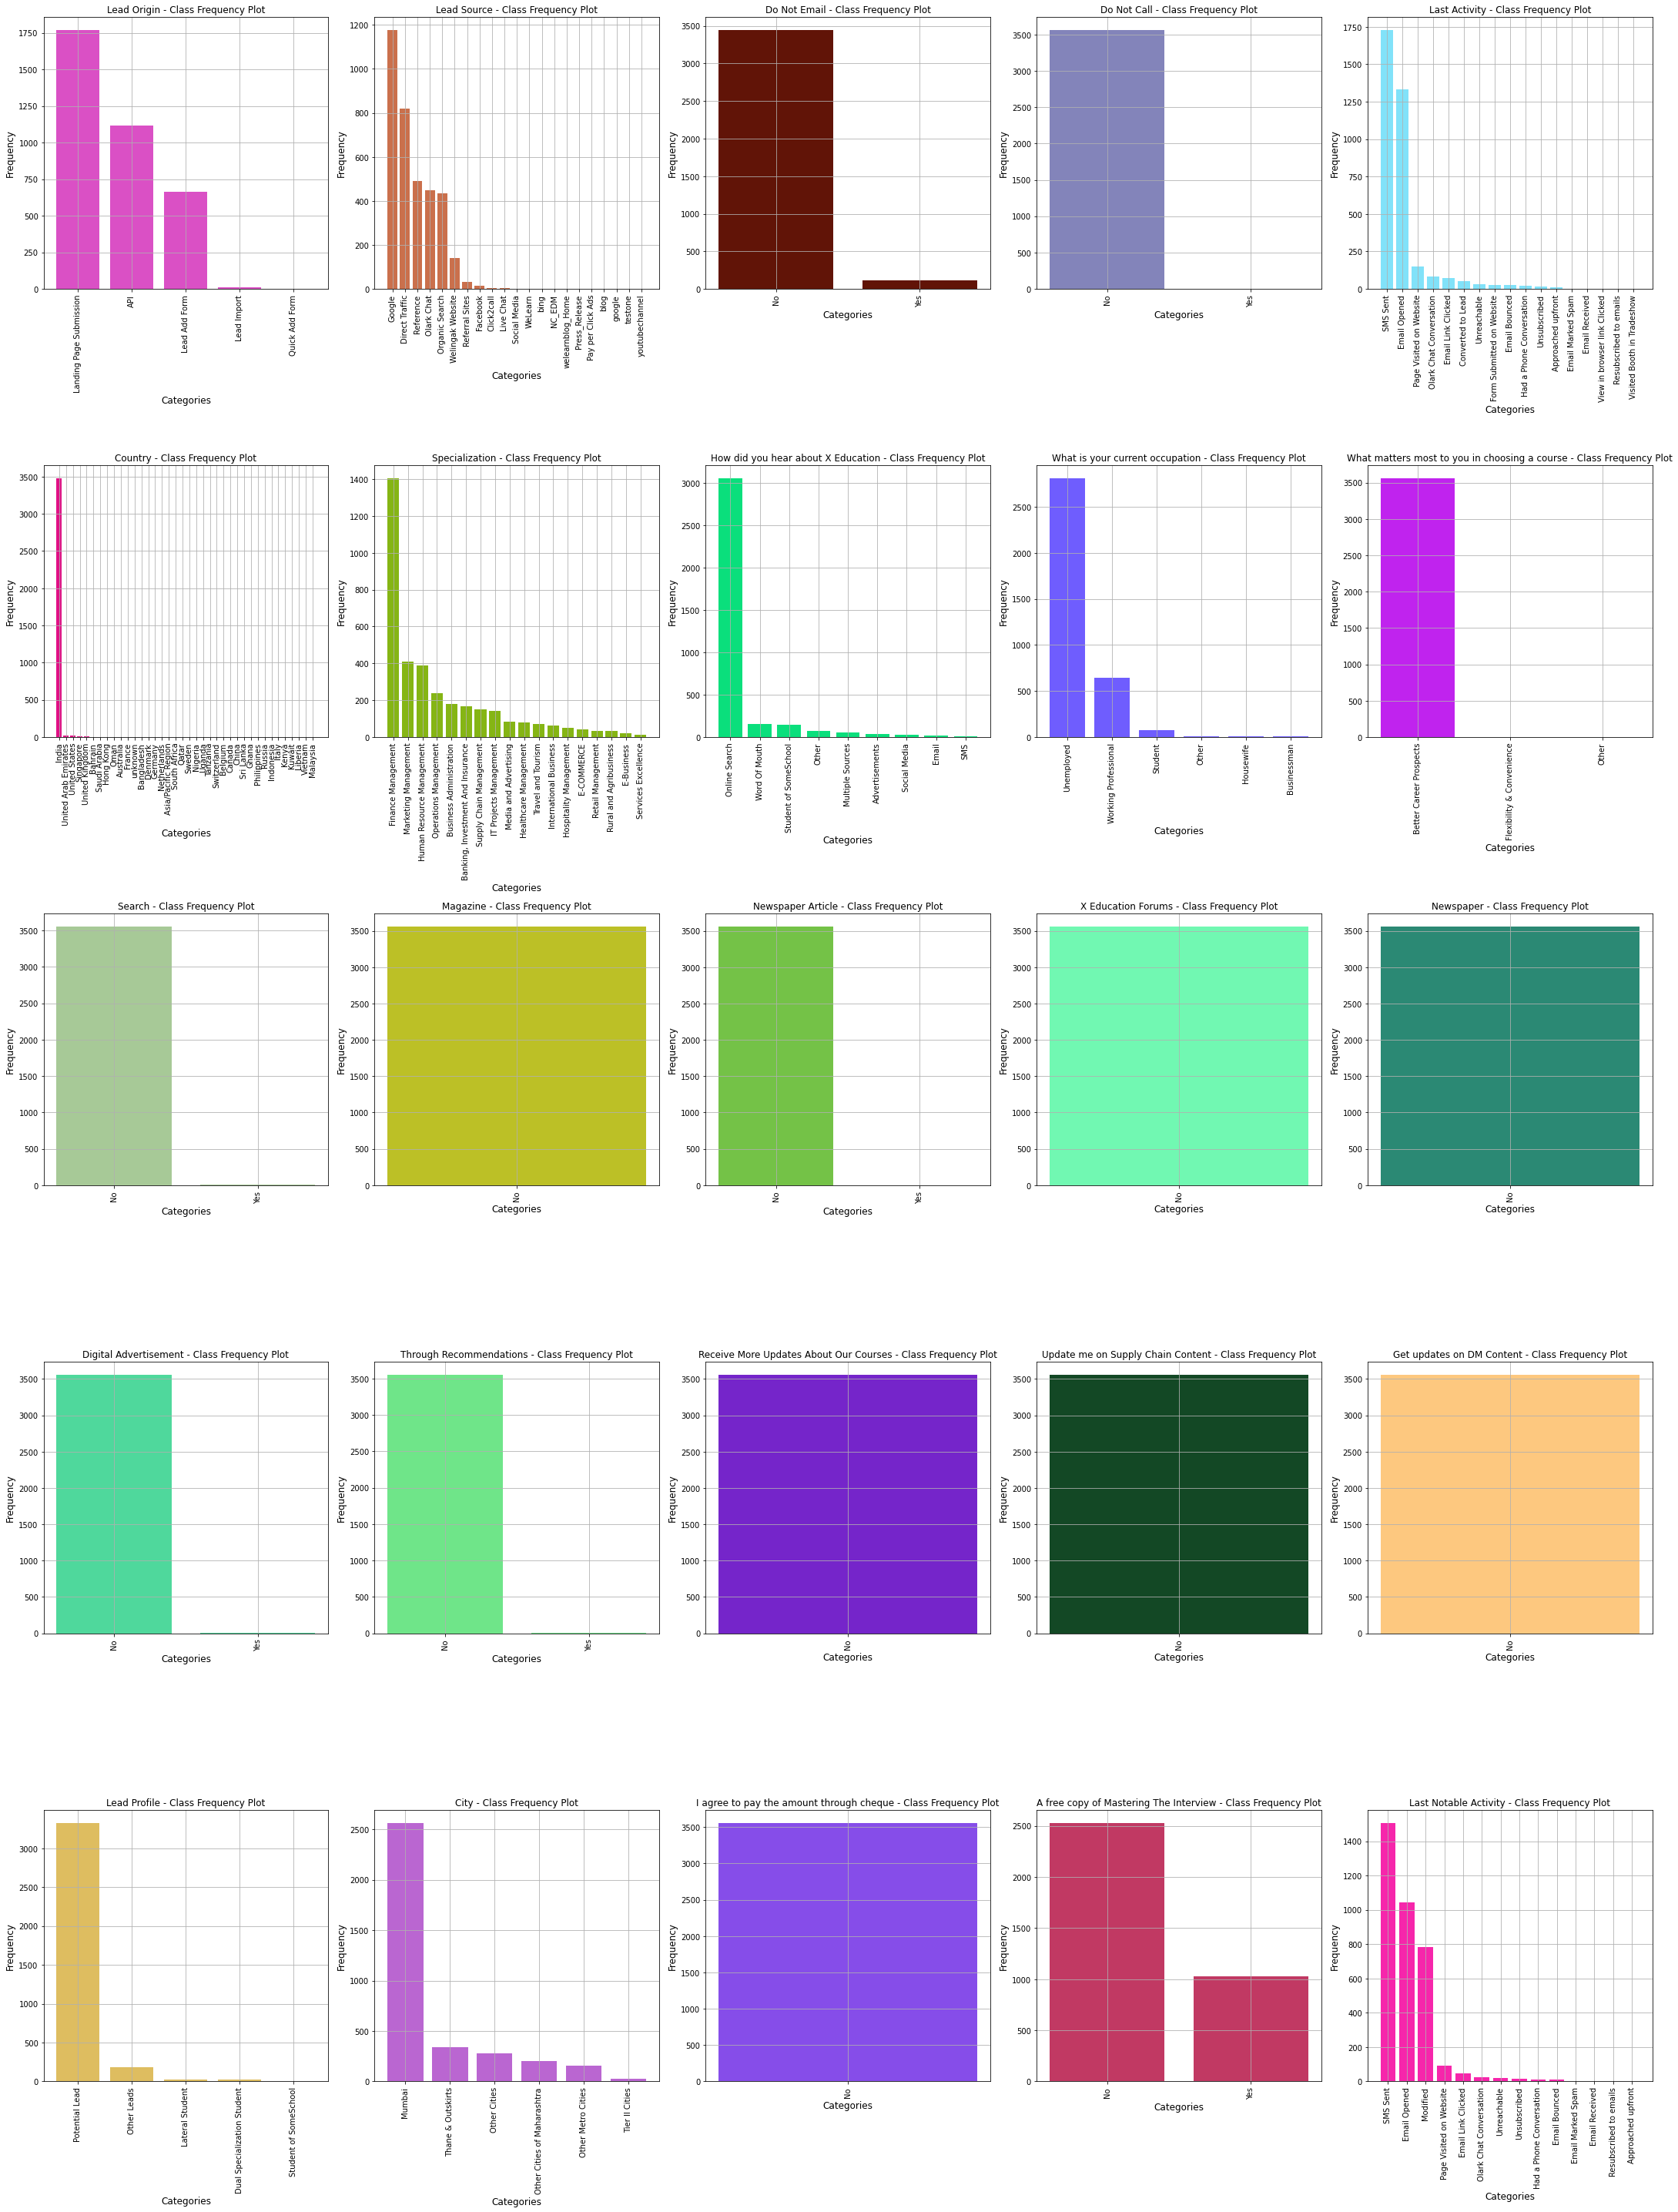

In [362]:
# Plot the
# Rotate the ticks.
fig_size = (30, 40)
nrows = 5
ncols = 5
plot_categ(nrows, ncols, df_pos, categ_pos_cols, fig_size)

#### Observations from above charts for leads that were converted:
* Most of the leads that have been converted are from **Lead Origin**- Lending Page Submission. 
* Majority of leads that were converted had the last Activity was SMS Activity followed by those who opened Email.
* Most of the leads were converted who heard about X education by online search
* Most of the leads converted were the people who have worked in **Finance Management** previously.
* **Lead source** of information is Google
* Majority of the leads converted are unemployed.
* Majority of the leads are converted from City -Mumbai

### Histogram Plot for Categorical Variables

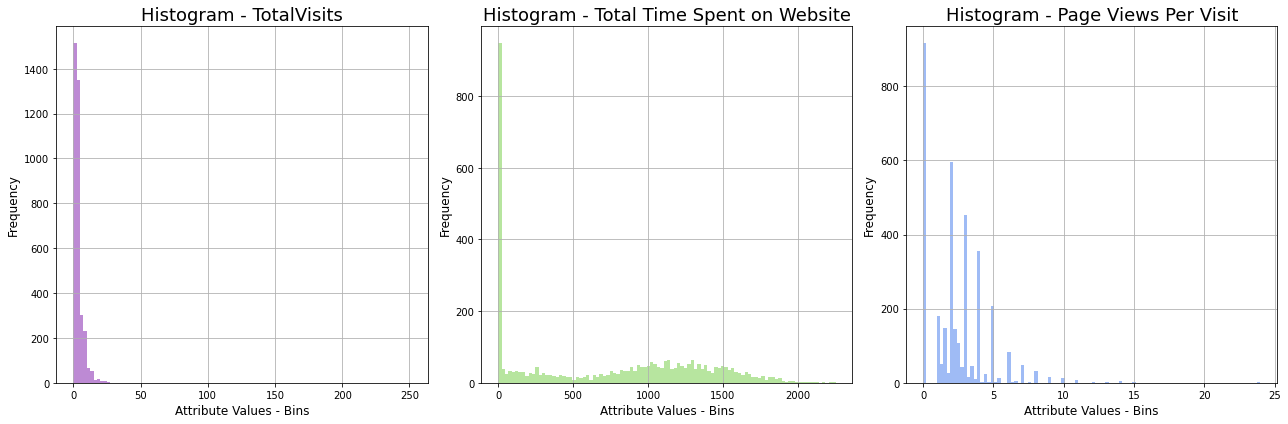

In [363]:
fig_size = (18, 6)
nrows = 1
ncols = 3
plot_hist(nrows, ncols, df_pos, num_pos_cols, fig_size)

### Box plots for Continuous Variables

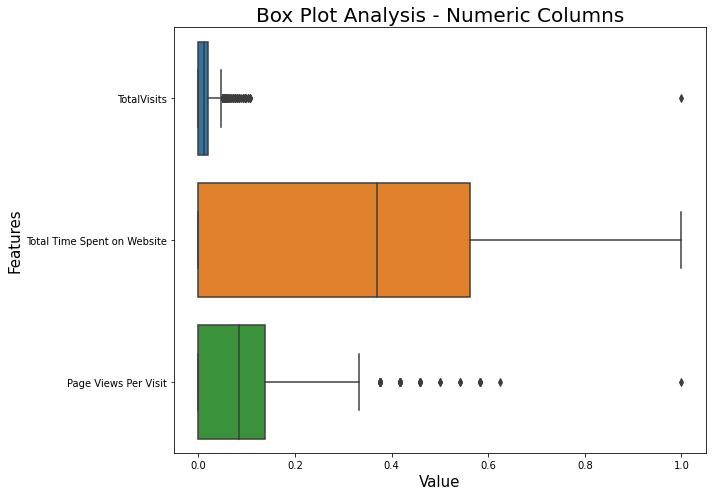

In [364]:
# Normalize the numeric columns so that the values can be plotted on the same scale
plt.figure(figsize=(10,7))
min_max_scaler = preprocessing.MinMaxScaler()
df_numerical = df_pos[list(num_pos_cols)]
x_scaled = min_max_scaler.fit_transform(df_numerical)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = num_pos_cols
sns.boxplot(y="variable", x="value", data=pd.melt(df_normalized), orient='h')
plt.xlabel('Value', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Box Plot Analysis - Numeric Columns', fontsize=20)
plt.tight_layout()
plt.show()

From the above boxplot we can say that there are two variables in our dataset for the leads that were converted that has outliers- 'TotalVisits' and 'Page Views Per Visit' and it is  right skewed distribution.


### Bivariate Analysis
#### Pairwise Plot Numeric Variable

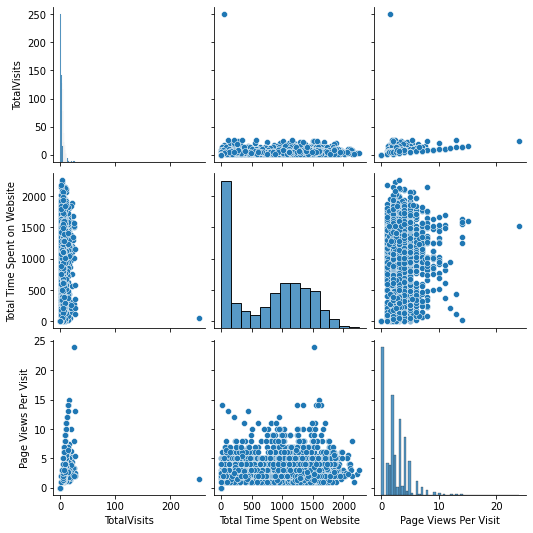

In [365]:
# Pairwise scatter plot for all the columns
sns.pairplot(df_pos[num_pos_cols])
plt.show()

Seems that there is a correlation between Pages Views Per Visit and TotalVisits

## Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [366]:
# List of categorical variables
categ_var = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 
 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 
 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
 'Get updates on DM Content', 'Lead Profile', 'City', 
 'I agree to pay the amount through cheque', 
 'A free copy of Mastering The Interview', 
 'Last Notable Activity']

# List of variables to map
binary_var = [col for col in categ_var if len(df_main[col].unique()) == 2] 

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_main[binary_var] = df_main[binary_var].apply(binary_map)

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [367]:
categ_var = list(set(categ_var) - set(binary_var))

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_main[categ_var], drop_first=True)

# Adding the results to the master dataframe
df_main= pd.concat([df_main, dummy1], axis=1)

In [368]:
# Move the Target variable to the end

# Print the position of the index of the column converted i.e. the target variable
print(f'Total number of Columns : {df_main.shape[1]}')
index_converted = [idx for idx, col in enumerate(df_main.columns) if col == 'Converted']
print(f'The current column number for Target Variable : {index_converted}')

df_main = df_main[[col for col in df_main.columns if col != 'Converted'] + ['Converted']]

index_moved = [idx for idx, col in enumerate(df_main.columns) if col == 'Converted']
print(f'The current column number for Target Variable : {index_moved[0]}')


Total number of Columns : 164
The current column number for Target Variable : [6]
The current column number for Target Variable : 163


The Converted Column has been moved to the end of the dataframe.

### Dropping the repeated variables

In [369]:
# Drop the actual columns, the columns for which we created the dummy variables
df_main = df_main.drop(categ_var, 1)

### Correlation of the features w.r.t to the target Variable

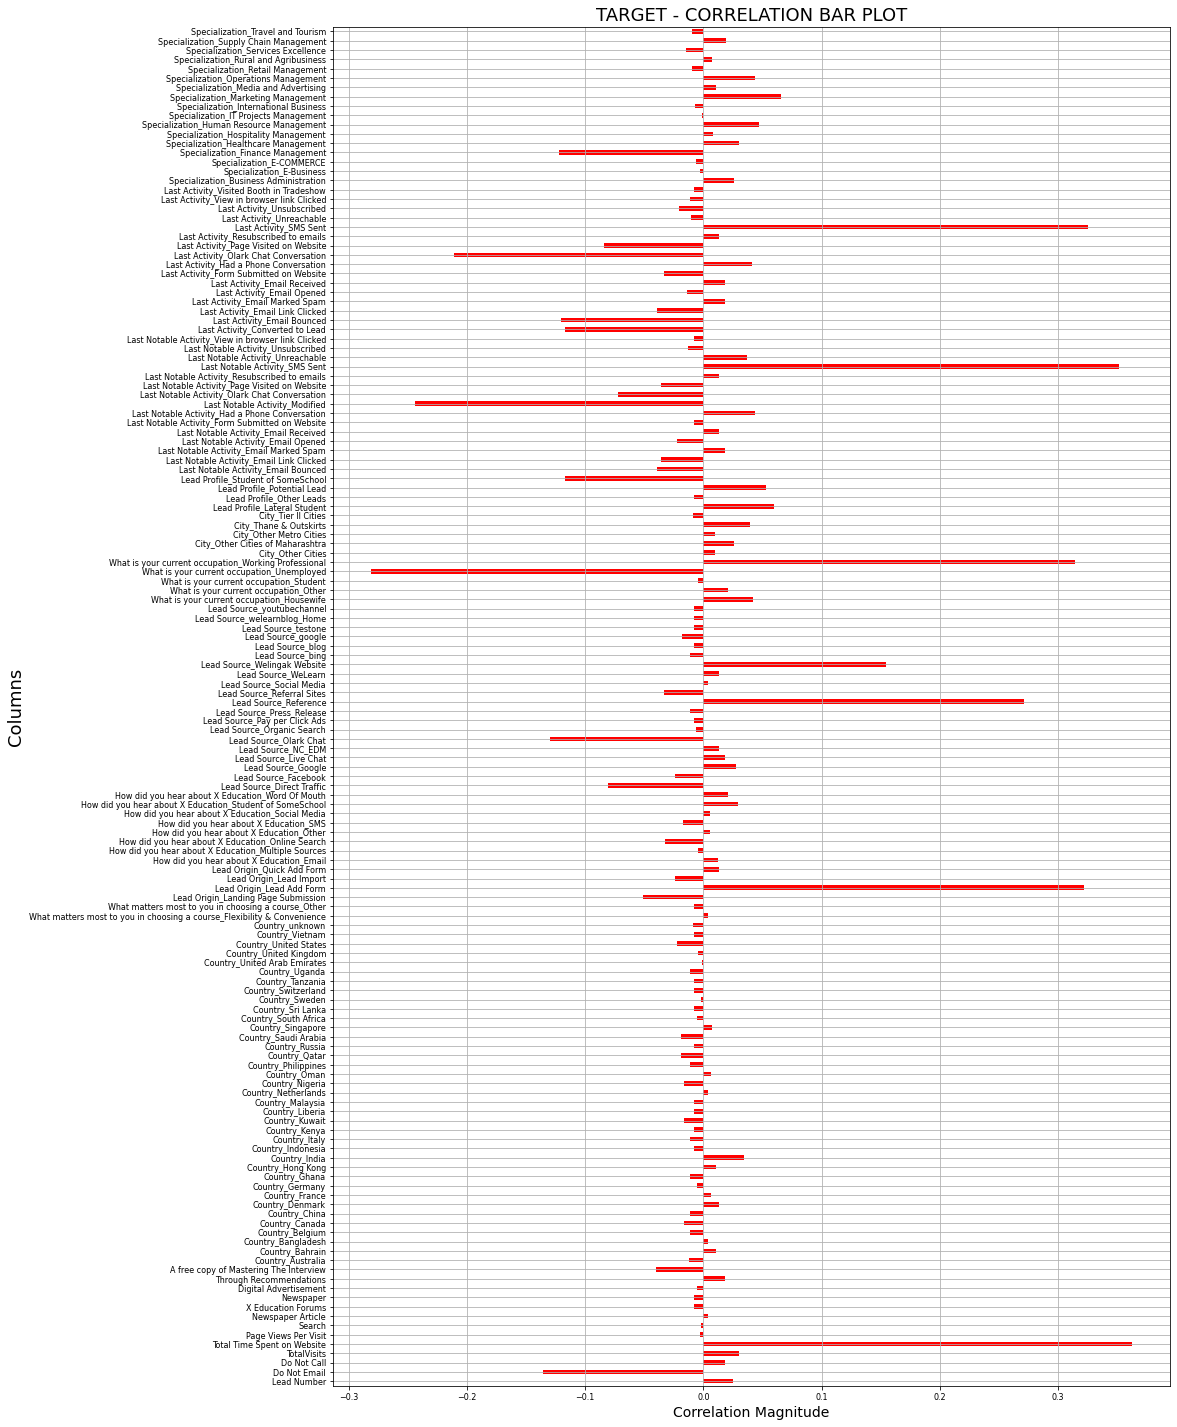

In [370]:
corrMatrix = df_main.corr()['Converted'][0:-1]
ax = corrMatrix.plot(kind='barh', figsize=(15,25), color='r',fontsize=8, grid=True)
ax.set_title("TARGET - CORRELATION BAR PLOT", fontsize=18)
ax.set_xlabel("Correlation Magnitude", fontsize=14)
ax.set_ylabel("Columns", fontsize=18)
plt.show()

In [371]:
# Checking the correlation  between 'Last Activity_SMS Sent and 'Last Notable Activity_SMS Sent'
corrMatrix1= df_main.corr()['Last Activity_SMS Sent'][0:-1]
corrMatrix1.sort_values(ascending=False)

Last Activity_SMS Sent                                  1.000000
Last Notable Activity_SMS Sent                          0.852707
Lead Profile_Potential Lead                             0.152641
Total Time Spent on Website                             0.117223
What is your current occupation_Working Professional    0.117024
                                                          ...   
Last Activity_Page Visited on Website                  -0.177346
Last Notable Activity_Modified                         -0.215569
Last Activity_Olark Chat Conversation                  -0.223030
Last Notable Activity_Email Opened                     -0.431632
Last Activity_Email Opened                             -0.512325
Name: Last Activity_SMS Sent, Length: 146, dtype: float64

In [372]:
# Checking the correlation  between 'Last Activity_Email Opened' and 'Last Notable Activity_Email Opened'
corrMatrix2= df_main.corr()['Last Activity_Email Opened'][0:-1]
corrMatrix2.sort_values(ascending=False)

Last Activity_Email Opened               1.000000
Last Notable Activity_Email Opened       0.842496
Lead Number                              0.107735
Lead Origin_Lead Import                  0.057675
Page Views Per Visit                     0.057575
                                           ...   
Do Not Email                            -0.224090
Last Activity_Olark Chat Conversation   -0.270363
Last Notable Activity_Modified          -0.273292
Last Notable Activity_SMS Sent          -0.436864
Last Activity_SMS Sent                  -0.512325
Name: Last Activity_Email Opened, Length: 146, dtype: float64

**Summary**

**Positive Influencers**

* Strongest positive correlation indicator towards lead score is the Total Time Spent on website with a correlation magnitude more than 0.35 with the target variable. X education should thoroughly monitor the website visits.
* The second highest positive  correlation indicator towards lead score is the Last Notable Activity performed by the student which is SMS-sent. X education should also be thoroughly monitoring this channel.
* The third highest positive correlation i.e. Last Activity Performed by the customer is SMS-Sent.**The second and the third highest indicator by definition are highly correlated with a correlation value of 0.85**
* The original identifier- Lead Origin has a significant positive influence on the lead score .
* Whether the customer is a working professional also has a significant positive effect on the lead score.

**Negative Influencers**

* **Last Activity_Email Opened and Last Notable Activity_Email Opened are highly correlated with a value of 0.84**. If the customer has not shown any activity on Email, then this negatively influences the lead score.
* If the last activity was done on Olark Chat Conversation , then it has a negative influence on the lead score.
* If the last  notable activity is Modified class then this also negative influences the lead score.
* If the last activity of the customer was visiting the page of the website, it is a negative influence on the lead score.

### Data Transformation

In [373]:
# Check the continuous variables for the outliers detection
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_df = df_main[numeric_cols]

In [374]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


We see the columns TotalVisits and Page Views Per Visit have a max value of 251 and 55 while the 99th percentile the maximum value is 251 and 55. But that being said, the data points are factual information and needs to be included in the data set for training.

#### Correlation

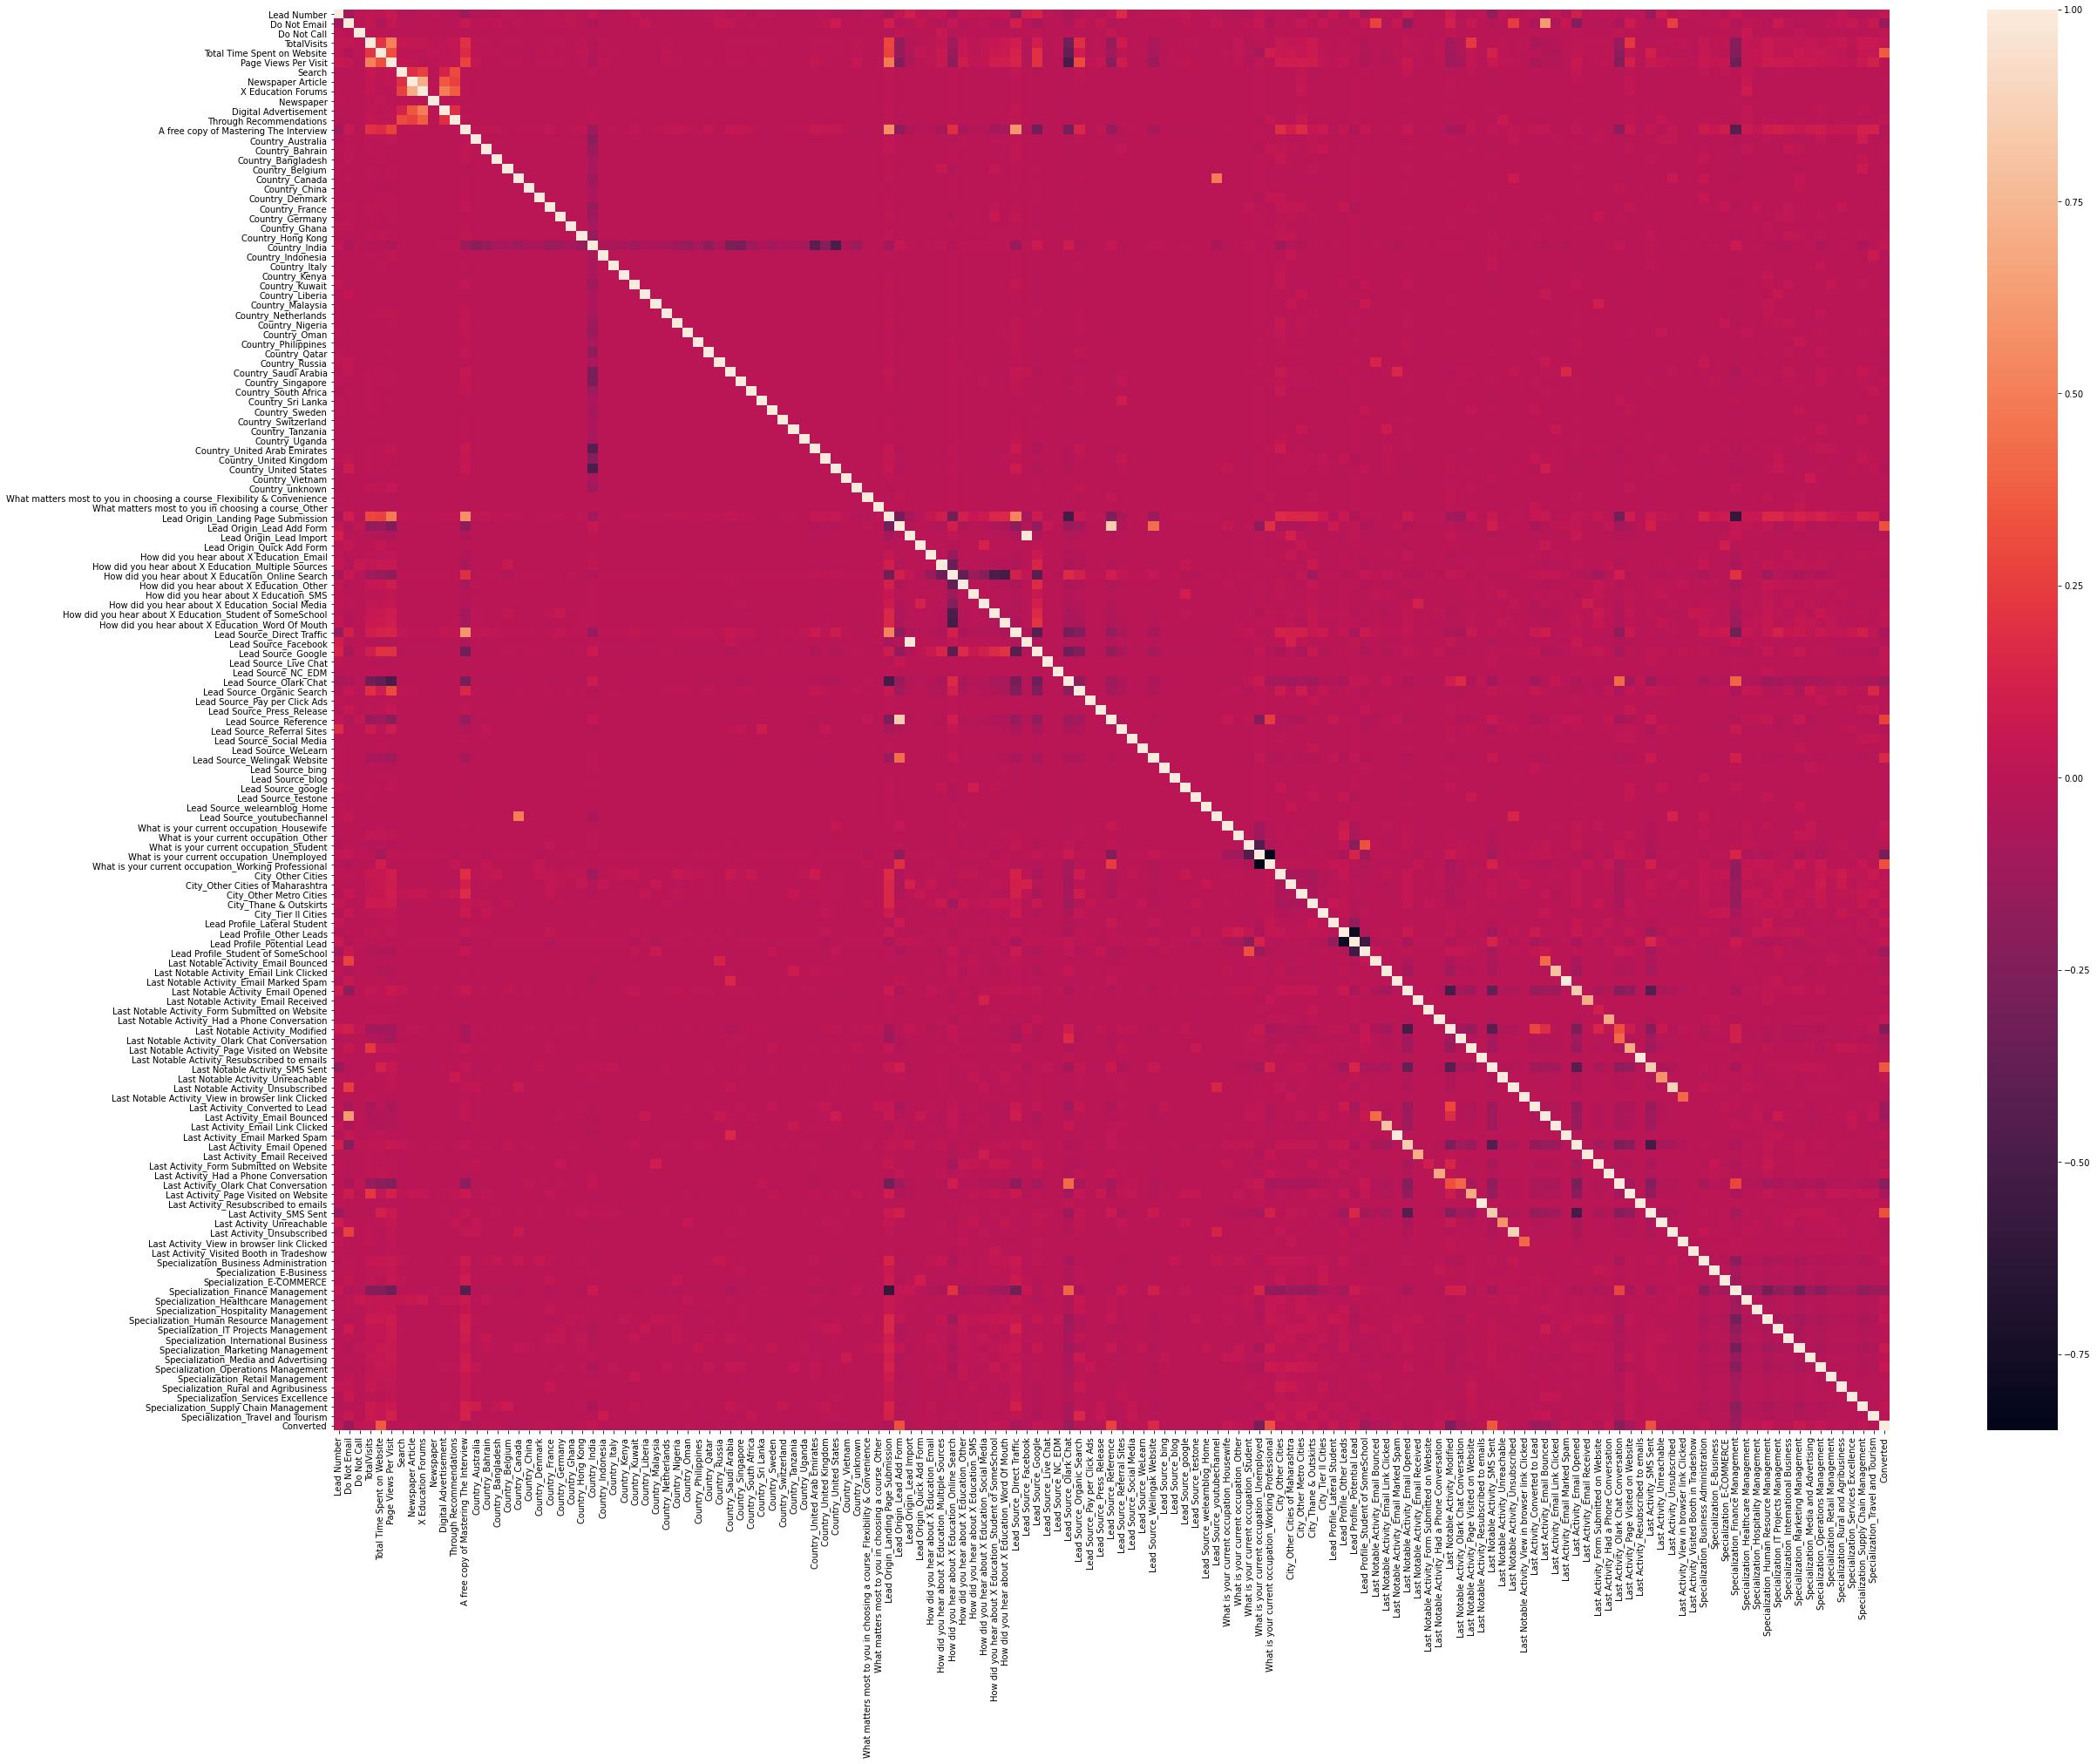

In [375]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(df_main.corr())
plt.show()

As discussed in the summary of the EDA, 

last notable activity_SMS-sent and last activity performed_SMS-sent have a very high correlation and last notable activity_Email Opened and Last activity performed Email_Opened have a high correlation, and should be dropped.

In [376]:
# Dropping the highly correlated columns
drop_cols = ['Last Notable Activity_SMS Sent', 'Last Activity_Email Opened']
df_main = df_main.drop(drop_cols, 1)


#### Selecting top 20 positive influencer for the lead score for  creating our model

In [377]:
train_ft= df_main.corr()['Converted'][0:-1]
train_col=list(train_ft.sort_values(ascending=False)[0:20].keys())
train_col

['Total Time Spent on Website',
 'Last Activity_SMS Sent',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Working Professional',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Specialization_Marketing Management',
 'Lead Profile_Lateral Student',
 'Lead Profile_Potential Lead',
 'Specialization_Human Resource Management',
 'Last Notable Activity_Had a Phone Conversation',
 'Specialization_Operations Management',
 'What is your current occupation_Housewife',
 'Last Activity_Had a Phone Conversation',
 'City_Thane & Outskirts',
 'Last Notable Activity_Unreachable',
 'Country_India',
 'Specialization_Healthcare Management',
 'TotalVisits',
 'How did you hear about X Education_Student of SomeSchool']

#### Test-Train Split

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
y = df_main['Converted']
df_main.drop(['Converted'], axis=1,inplace=True)
X=df_main[train_col]


In [380]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [381]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[train_col] = scaler.fit_transform(X_train[train_col])

X_train.head()

,Total Time Spent on Website,Last Activity_SMS Sent,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Marketing Management,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Specialization_Human Resource Management,Last Notable Activity_Had a Phone Conversation,Specialization_Operations Management,What is your current occupation_Housewife,Last Activity_Had a Phone Conversation,City_Thane & Outskirts,Last Notable Activity_Unreachable,Country_India,Specialization_Healthcare Management,TotalVisits,How did you hear about X Education_Student of SomeSchool
1871,-0.885371,-0.655280,-0.293817,-0.290075,-0.25331,-0.119457,3.115864,-0.049798,0.297527,-0.317705,-0.041274,-0.246324,-0.037328,-0.058421,-0.293507,-0.057073,0.180463,-0.125949,-0.657764,-0.188528
6795,0.005716,-0.655280,-0.293817,-0.290075,-0.25331,-0.119457,-0.320938,-0.049798,0.297527,-0.317705,-0.041274,-0.246324,-0.037328,-0.058421,-0.293507,-0.057073,0.180463,-0.125949,0.099483,-0.188528
3516,-0.691418,-0.655280,-0.293817,-0.290075,-0.25331,-0.119457,-0.320938,-0.049798,0.297527,-0.317705,-0.041274,-0.246324,-0.037328,-0.058421,-0.293507,-0.057073,0.180463,-0.125949,0.288795,-0.188528
8105,1.365219,1.526065,-0.293817,-0.290075,-0.25331,-0.119457,-0.320938,-0.049798,0.297527,-0.317705,-0.041274,-0.246324,-0.037328,-0.058421,-0.293507,-0.057073,0.180463,-0.125949,0.288795,-0.188528
3934,-0.885371,-0.655280,-0.293817,-0.290075,-0.25331,-0.119457,-0.320938,-0.049798,0.297527,-0.317705,-0.041274,-0.246324,-0.037328,-0.058421,-0.293507,-0.057073,0.180463,-0.125949,-0.657764,-0.188528


## Model Building 

In [382]:
import statsmodels.api as sm

In [383]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.2
Date:                Sun, 07 Mar 2021   Deviance:                       5772.3
Time:                        14:31:28   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -0.4778     19.603     -0.024      0.981     -38.898      37.942
Total Time Spent on Website                                  0.9322      0.034     27.460      0.000       0.866       0.999
Last Activity_SMS Sent                                       0.6246      0.032     19.448      0.000       0.562       0.688
Lead Origin_Lead Add Form                                    0.6818      0.121      5.619      0.000       0.444       0.920
What is your current occupation_Working Professional         0.7564      0.049     15.427      0.000       0.660       0.852
Lead Source_Reference                                        0.2195      0.116      1.896      0.058      -0.007       0.446
Lead Source_Welingak Website                                 0.3233      0.100      3.243      0.001       0.128       0.519
Specialization_Marketing Management                          0.0171      0.032      0.529      0.597      -0.046       0.080
Lead Profile_Lateral Student                                 0.1458      0.054      2.677      0.007       0.039       0.253
Lead Profile_Potential Lead                                  0.0620      0.036      1.734      0.083      -0.008       0.132
Specialization_Human Resource Management                    -0.0020      0.033     -0.062      0.951      -0.066       0.062
Last Notable Activity_Had a Phone Conversation               0.1287      0.059      2.181      0.029       0.013       0.244
Specialization_Operations Management                         0.0117      0.033      0.355      0.722      -0.053       0.076
What is your current occupation_Housewife                    0.8605    525.137      0.002      0.999   -1028.388    1030.109
Last Activity_Had a Phone Conversation                       0.0224      0.054      0.414      0.679      -0.084       0.128
City_Thane & Outskirts                                       0.0171      0.032      0.535      0.593      -0.045       0.080
Last Notable Activity_Unreachable                            0.1053      0.028      3.698      0.000       0.049       0.161
Country_India                                                0.0741      0.033      2.225      0.026       0.009       0.139
Specialization_Healthcare Management                         0.0248      0.032      0.780      0.435      -0.038       0.087
TotalVisits                                                  0.0385      0.029      1.340      0.180      -0.018       0.095
How did you hear about X Education_Student of SomeSchool     0.0228      0.032      0.716      0.474      -0.040       0.085
===================================================================================

###  Feature Selection Using RFE

In [384]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [385]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [386]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True])

In [387]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Marketing Management', False, 4),
 ('Lead Profile_Lateral Student', True, 1),
 ('Lead Profile_Potential Lead', True, 1),
 ('Specialization_Human Resource Management', False, 6),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Specialization_Operations Management', False, 5),
 ('What is your current occupation_Housewife', True, 1),
 ('Last Activity_Had a Phone Conversation', False, 2),
 ('City_Thane & Outskirts', False, 3),
 ('Last Notable Activity_Unreachable', True, 1),
 ('Country_India', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('TotalVisits', True, 1),
 ('How did you hear about X Education_Student of SomeSchool', True, 1)]

In [388]:
col = X_train.columns[rfe.support_]

In [389]:
X_train.columns[~rfe.support_]

Index(['Specialization_Marketing Management',
       'Specialization_Human Resource Management',
       'Specialization_Operations Management',
       'Last Activity_Had a Phone Conversation', 'City_Thane & Outskirts'],
      dtype='object')

##### Assessing the model with StatsModels

In [390]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.6
Date:                Sun, 07 Mar 2021   Deviance:                       5773.2
Time:                        14:31:29   Pearson chi2:                 7.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -0.4769     19.525     -0.024      0.981     -38.746      37.792
Total Time Spent on Website                                  0.9354      0.034     27.799      0.000       0.869       1.001
Last Activity_SMS Sent                                       0.6244      0.032     19.459      0.000       0.561       0.687
Lead Origin_Lead Add Form                                    0.6807      0.121      5.609      0.000       0.443       0.919
What is your current occupation_Working Professional         0.7591      0.049     15.534      0.000       0.663       0.855
Lead Source_Reference                                        0.2228      0.116      1.925      0.054      -0.004       0.450
Lead Source_Welingak Website                                 0.3227      0.100      3.236      0.001       0.127       0.518
Lead Profile_Lateral Student                                 0.1467      0.054      2.700      0.007       0.040       0.253
Lead Profile_Potential Lead                                  0.0617      0.036      1.725      0.085      -0.008       0.132
Last Notable Activity_Had a Phone Conversation               0.1453      0.045      3.234      0.001       0.057       0.233
What is your current occupation_Housewife                    0.8603    523.066      0.002      0.999   -1024.330    1026.051
Last Notable Activity_Unreachable                            0.1052      0.028      3.696      0.000       0.049       0.161
Country_India                                                0.0738      0.033      2.216      0.027       0.009       0.139
Specialization_Healthcare Management                         0.0235      0.032      0.742      0.458      -0.039       0.086
TotalVisits                                                  0.0390      0.029      1.361      0.173      -0.017       0.095
How did you hear about X Education_Student of SomeSchool     0.0237      0.032      0.746      0.456      -0.038       0.086
============================================================================================================================
"""

In [391]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.092606
6795    0.194790
3516    0.112653
8105    0.772391
3934    0.092606
4844    0.989200
3297    0.110552
8071    0.990211
987     0.293198
7423    0.855335
dtype: float64

In [392]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09260602, 0.19479036, 0.1126533 , 0.77239061, 0.09260602,
       0.98919971, 0.110552  , 0.99021061, 0.29319844, 0.85533475])

In [393]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [394]:
y_train_pred_final = pd.DataFrame({'True_label':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,True_label,Predicted_Prob,ProspectID
0,0,0.092606,1871
1,0,0.194790,6795
2,0,0.112653,3516
3,0,0.772391,8105
4,0,0.092606,3934


##### Creating new column 'Predicted_label' with 1 if Cconverted Probability > 0.5 else 0

In [395]:
y_train_pred_final['Predicted_label'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final = y_train_pred_final[['ProspectID'] + ['True_label', 'Predicted_Prob', 'Predicted_label']]

# Let's see the head
y_train_pred_final.head()

,ProspectID,True_label,Predicted_Prob,Predicted_label
0,1871,0,0.092606,0
1,6795,0,0.194790,0
2,3516,0,0.112653,0
3,8105,0,0.772391,1
4,3934,0,0.092606,0


In [396]:
from sklearn import metrics

In [397]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.True_label, y_train_pred_final.Predicted_label )
print(confusion)

[[3579  423]
 [ 907 1559]]


In [398]:
# Checking for the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.True_label, y_train_pred_final.Predicted_label))

0.7943722943722944


### Checking VIF

Dropping Strategy, enumerated priority wise

1. High Pvalue and High VIF   -> Drop straight straight away
2. High Pvalue and low VIF    -> Drop these at 2nd
3. Low Pvalue and High VIF    -> With the 2. removal, VIF of the variables which is high can be reduced.
4. Low Pvalue and Low VIF     -> never drop

In [399]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [400]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,14.54
4,Lead Source_Reference,12.15
5,Lead Source_Welingak Website,3.71
3,What is your current occupation_Working Profes...,1.10
0,Total Time Spent on Website,1.09
1,Last Activity_SMS Sent,1.07
7,Lead Profile_Potential Lead,1.06
13,TotalVisits,1.06
6,Lead Profile_Lateral Student,1.04
9,What is your current occupation_Housewife,1.01


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [401]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Last Notable Activity_Had a Phone Conversation',
       'What is your current occupation_Housewife',
       'Last Notable Activity_Unreachable', 'Country_India',
       'Specialization_Healthcare Management', 'TotalVisits',
       'How did you hear about X Education_Student of SomeSchool'],
      dtype='object')

In [402]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.5
Date:                Sun, 07 Mar 2021   Deviance:                       5813.0
Time:                        14:31:30   Pearson chi2:                 7.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -0.4717     19.575     -0.024      0.981     -38.838      37.895
Total Time Spent on Website                                  0.9226      0.033     27.569      0.000       0.857       0.988
Last Activity_SMS Sent                                       0.6317      0.032     19.767      0.000       0.569       0.694
What is your current occupation_Working Professional         0.7555      0.049     15.480      0.000       0.660       0.851
Lead Source_Reference                                        0.8135      0.047     17.184      0.000       0.721       0.906
Lead Source_Welingak Website                                 0.6147      0.085      7.235      0.000       0.448       0.781
Lead Profile_Lateral Student                                 0.1651      0.055      3.000      0.003       0.057       0.273
Lead Profile_Potential Lead                                  0.0651      0.036      1.826      0.068      -0.005       0.135
Last Notable Activity_Had a Phone Conversation               0.1448      0.045      3.223      0.001       0.057       0.233
What is your current occupation_Housewife                    0.8599    524.405      0.002      0.999   -1026.955    1028.675
Last Notable Activity_Unreachable                            0.1040      0.028      3.661      0.000       0.048       0.160
Country_India                                                0.0764      0.033      2.301      0.021       0.011       0.142
Specialization_Healthcare Management                         0.0260      0.032      0.818      0.414      -0.036       0.088
TotalVisits                                                  0.0319      0.029      1.098      0.272      -0.025       0.089
How did you hear about X Education_Student of SomeSchool     0.0206      0.032      0.651      0.515      -0.041       0.083
============================================================================================================================
"""

In [403]:
# Creation train predction column
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Predicted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted probability > 0.5 else 0
y_train_pred_final['Predicted_label'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,ProspectID,True_label,Predicted_Prob,Predicted_label
0,1871,0,0.095484,0
1,6795,0,0.197484,0
2,3516,0,0.115143,0
3,8105,0,0.774911,1
4,3934,0,0.095484,0


In [404]:
# Let's check the overall accuracy again
print(metrics.accuracy_score(y_train_pred_final.True_label, y_train_pred_final.Predicted_label))

0.7920531849103277


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [405]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Reference,1.12
2,What is your current occupation_Working Profes...,1.10
0,Total Time Spent on Website,1.09
1,Last Activity_SMS Sent,1.07
6,Lead Profile_Potential Lead,1.06
12,TotalVisits,1.06
5,Lead Profile_Lateral Student,1.03
4,Lead Source_Welingak Website,1.02
8,What is your current occupation_Housewife,1.01
13,How did you hear about X Education_Student of ...,1.01


In [406]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.5
Date:                Sun, 07 Mar 2021   Deviance:                       5813.0
Time:                        14:31:31   Pearson chi2:                 7.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -0.4717     19.575     -0.024      0.981     -38.838      37.895
Total Time Spent on Website                                  0.9226      0.033     27.569      0.000       0.857       0.988
Last Activity_SMS Sent                                       0.6317      0.032     19.767      0.000       0.569       0.694
What is your current occupation_Working Professional         0.7555      0.049     15.480      0.000       0.660       0.851
Lead Source_Reference                                        0.8135      0.047     17.184      0.000       0.721       0.906
Lead Source_Welingak Website                                 0.6147      0.085      7.235      0.000       0.448       0.781
Lead Profile_Lateral Student                                 0.1651      0.055      3.000      0.003       0.057       0.273
Lead Profile_Potential Lead                                  0.0651      0.036      1.826      0.068      -0.005       0.135
Last Notable Activity_Had a Phone Conversation               0.1448      0.045      3.223      0.001       0.057       0.233
What is your current occupation_Housewife                    0.8599    524.405      0.002      0.999   -1026.955    1028.675
Last Notable Activity_Unreachable                            0.1040      0.028      3.661      0.000       0.048       0.160
Country_India                                                0.0764      0.033      2.301      0.021       0.011       0.142
Specialization_Healthcare Management                         0.0260      0.032      0.818      0.414      -0.036       0.088
TotalVisits                                                  0.0319      0.029      1.098      0.272      -0.025       0.089
How did you hear about X Education_Student of SomeSchool     0.0206      0.032      0.651      0.515      -0.041       0.083
============================================================================================================================
"""

We see that the VIF of all the variables is less than 5 but there are some variables for which the P values is greater than 0.05. We need to remove the High P value variables and check again whether the VIF value of some variables go up.

In [407]:
# Get the variables with VIF greater than
low_vif_var = vif[vif['VIF'] < 5]['Features']

# Get the variables with P value greater than 0.05
high_p_var = [ var for var in res.pvalues.keys() if res.pvalues[var] >=0.08]


# Intersection of the Low VIF and high P values.

drop_columns = set(low_vif_var).intersection(set(high_p_var))
drop_columns

{'How did you hear about X Education_Student of SomeSchool',
 'Specialization_Healthcare Management',
 'TotalVisits',
 'What is your current occupation_Housewife'}

In [408]:
# We need to drop the above columns 
col = col.drop(drop_columns, 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Sun, 07 Mar 2021   Deviance:                       5831.2
Time:                        14:31:31   Pearson chi2:                 7.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4966      0.036    -13.903      0.000      -0.567      -0.427
Total Time Spent on Website                              0.9289      0.033     28.008      0.000       0.864       0.994
Last Activity_SMS Sent                                   0.6287      0.032     19.690      0.000       0.566       0.691
What is your current occupation_Working Professional     0.7541      0.049     15.472      0.000       0.659       0.850
Lead Source_Reference                                    0.8171      0.047     17.366      0.000       0.725       0.909
Lead Source_Welingak Website                             0.6120      0.085      7.206      0.000       0.446       0.778
Lead Profile_Lateral Student                             0.1643      0.055      2.987      0.003       0.056       0.272
Lead Profile_Potential Lead                              0.0561      0.035      1.596      0.110      -0.013       0.125
Last Notable Activity_Had a Phone Conversation           0.1464      0.045      3.259      0.001       0.058       0.234
Last Notable Activity_Unreachable                        0.1038      0.028      3.651      0.000       0.048       0.159
Country_India                                            0.0754      0.033      2.279      0.023       0.011       0.140
========================================================================================================================
"""

In [409]:
# Check the training Accuracy again 

# Creation train predction column
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Predicted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted probability > 0.5 else 0
y_train_pred_final['Predicted_label'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.True_label, y_train_pred_final.Predicted_label))

0.7917439703153989


There is no significant drop in the accuracy of mode after removal of the low VIF and High P value variables.
Previous accuracy : 0.7920531849103277

Lets check if the VIF of any variables increased after the above pruning.

In [410]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Reference,1.10
2,What is your current occupation_Working Profes...,1.09
1,Last Activity_SMS Sent,1.07
6,Lead Profile_Potential Lead,1.06
0,Total Time Spent on Website,1.05
5,Lead Profile_Lateral Student,1.03
4,Lead Source_Welingak Website,1.02
7,Last Notable Activity_Had a Phone Conversation,1.00
8,Last Notable Activity_Unreachable,1.00
9,Country_India,1.00


**We see that the no variables have high VIF and have a P value under the accepted range i.e. 0.05 and that too without any significant drop in the accuracy**

### Final Model

In [411]:
# creating scaler and tranform for the selected variables
X_train[col] = scaler.fit_transform(X_train[col])

In [412]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm_final = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_final = logm_final.fit()
res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Sun, 07 Mar 2021   Deviance:                       5831.2
Time:                        14:31:32   Pearson chi2:                 7.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4966      0.036    -13.903      0.000      -0.567      -0.427
Total Time Spent on Website                              0.9289      0.033     28.008      0.000       0.864       0.994
Last Activity_SMS Sent                                   0.6287      0.032     19.690      0.000       0.566       0.691
What is your current occupation_Working Professional     0.7541      0.049     15.472      0.000       0.659       0.850
Lead Source_Reference                                    0.8171      0.047     17.366      0.000       0.725       0.909
Lead Source_Welingak Website                             0.6120      0.085      7.206      0.000       0.446       0.778
Lead Profile_Lateral Student                             0.1643      0.055      2.987      0.003       0.056       0.272
Lead Profile_Potential Lead                              0.0561      0.035      1.596      0.110      -0.013       0.125
Last Notable Activity_Had a Phone Conversation           0.1464      0.045      3.259      0.001       0.058       0.234
Last Notable Activity_Unreachable                        0.1038      0.028      3.651      0.000       0.048       0.159
Country_India                                            0.0754      0.033      2.279      0.023       0.011       0.140
========================================================================================================================
"""

After the creation of the final model, we observe 

The variables Total Time Spent on Website, Last Activity_SMS Sent, What is your current occupation_Working Professional, Lead Source_Reference and Lead Source_Welingak Website are strong positive influencers in the potential lead prediciton.

In [413]:
# Check the training Accuracy again 

# Creation train predction column
y_train_pred = res_final.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Predicted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted probability > 0.5 else 0
y_train_pred_final['Predicted_label'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(f"The training accuracy of the Final model : {(metrics.accuracy_score(y_train_pred_final.True_label, y_train_pred_final.Predicted_label))}")

The training accuracy of the Final model : 0.7917439703153989


## Metrics beyond simply accuracy

In our usecase, We want to maximize the number of potential leads to actual customers. We should be fine to predict a non potential lead to be an actual lead but we definitely don't want to miss out on predicting the actual future customer be a non potential lead i.e. **False Negative Should be low**.

In [414]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.True_label, y_train_pred_final.Predicted_label)
confusion

array([[3585,  417],
       [ 930, 1536]])

In [415]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [416]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6228710462287105

In [417]:
# Let us calculate specificity
TN / float(TN+FP)

0.8958020989505248

In [418]:
# Calculate false postive rate -when customer does not have churned
print(FP/ float(TN+FP))

0.10419790104947527


In [419]:
# positive predictive value 
print (TP / float(TP+FP))

0.7864823348694316


In [420]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7940199335548173


* ROC Curve
* Precision and Recall (F1 Score)

#### Plotting the ROC Curve

In [421]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [422]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.True_label, y_train_pred_final.Predicted_Prob, drop_intermediate = False)

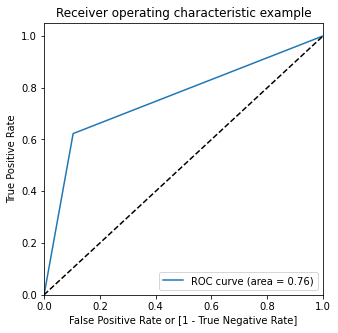

In [423]:
draw_roc(y_train_pred_final.True_label, y_train_pred_final.Predicted_label)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [424]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.True_label, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.516388  0.948094  0.250375
0.2   0.2  0.748454  0.890916  0.660670
0.3   0.3  0.752474  0.800892  0.722639
0.4   0.4  0.782931  0.712084  0.826587
0.5   0.5  0.791744  0.622871  0.895802
0.6   0.6  0.787106  0.556772  0.929035
0.7   0.7  0.772109  0.478913  0.952774
0.8   0.8  0.740260  0.358475  0.975512
0.9   0.9  0.707947  0.248581  0.991004


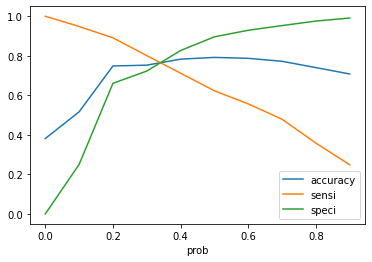

In [425]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [426]:
# Keeping the threshold as the 0.35 and get the output predictions

y_train_pred_final['final_predicted'] = y_train_pred_final.Predicted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,ProspectID,True_label,Predicted_Prob,Predicted_label,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1871,0,0.097997,0,1,0,0,0,0,0,0,0,0,0,0
1,6795,0,0.199099,0,1,1,0,0,0,0,0,0,0,0,0
2,3516,0,0.115116,0,1,1,0,0,0,0,0,0,0,0,0
3,8105,0,0.775964,1,1,1,1,1,1,1,1,1,0,0,1
4,3934,0,0.097997,0,1,0,0,0,0,0,0,0,0,0,0


In [427]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.True_label, y_train_pred_final.final_predicted)

0.7714904143475572

In [428]:
# Confusion matrix with final_predicted variable

confusion2 = metrics.confusion_matrix(y_train_pred_final.True_label, y_train_pred_final.final_predicted )
confusion2

array([[3125,  877],
       [ 601, 1865]])

In [429]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [430]:
# Let's see the sensitivity of our logistic regression model
print(f'TPR (Sensitivity) : {TP / float(TP+FN)}')

# Let us calculate specificity
print(f'TNR (Specificity): {TN / float(TN+FP)}')

# Calculate false postive rate - predicting when customer does not have converted
print(f'FPR : {FP/ float(TN+FP)}')

# Positive predictive value 
print (f'Total positives predicted  percentage : {TP / float(TP+FP)}')

# Negative predictive value
print (f'Total negative predicted percentage : {TN / float(TN+ FN)}')

TPR (Sensitivity) : 0.7562854825628548
TNR (Specificity): 0.7808595702148926
FPR : 0.21914042978510745
Total positives predicted  percentage : 0.6801604668125456
Total negative predicted percentage : 0.8387010198604401


### Precision and Recall

In [431]:
confusion = metrics.confusion_matrix(y_train_pred_final.True_label, y_train_pred_final.Predicted_label )
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.7864823348694316
Recall : 0.6228710462287105


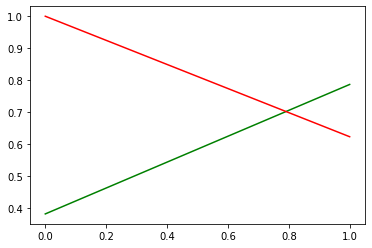

In [432]:
# Precision Recall tradeoff 

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.True_label, y_train_pred_final.Predicted_label)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Test Set Evaluation 


In [433]:
# Fitting the test set on the transform variables from the train set.
X_test[col] = scaler.transform(X_test[col])
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Source_Reference,Lead Source_Welingak Website,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Country_India
4269,1.011000e+03,1.000000e+00,5.163189e-17,8.898262e-17,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0
2376,6.701161e-17,1.000000e+00,5.163189e-17,1.000000e+00,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0
7766,5.900000e+01,-3.075943e-17,1.000000e+00,8.898262e-17,1.043623e-17,1.318261e-17,1.0,2.306957e-17,1.000000e+00,1.0
9199,6.701161e-17,-3.075943e-17,5.163189e-17,8.898262e-17,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0
4359,6.701161e-17,-3.075943e-17,5.163189e-17,1.000000e+00,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0


In [434]:
# Make predictions on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res_final.predict(X_test_sm)


In [435]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [436]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [437]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index
y_test_df.head()

,Converted,ProspectID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [438]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [439]:
y_test_df = y_test_df[['ProspectID', 'Converted']]
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,ProspectID,Converted,0
0,4269,1,1.000000
1,2376,1,0.746621
2,7766,1,1.000000
3,9199,0,0.409726
4,4359,1,0.611112


In [440]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Lead_Prob
0,4269,1,1.000000
1,2376,1,0.746621
2,7766,1,1.000000
3,9199,0,0.409726
4,4359,1,0.611112


In [441]:
# Using the threshold of 0.35 obtained from the ROC analysis, to get the final prediction value
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,ProspectID,Converted,Lead_Prob,final_predicted
0,4269,1,1.000000,1
1,2376,1,0.746621,1
2,7766,1,1.000000,1
3,9199,0,0.409726,1
4,4359,1,0.611112,1


In [442]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.395021645021645

In [443]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print(confusion2)
# Let's see the sensitivity of our logistic regression model
print(f'Sensitivity : {TP / float(TP+FN)}')

# Let us calculate specificity
print(f'Specificity : {TN / float(TN+FP)}')

[[   0 1677]
 [   0 1095]]
Sensitivity : 1.0
Specificity : 0.0


**Summary**

* We see that the test set accuracy is 39.5% and the Sensitivity is 1 because there are no False Negative predicted.

* We also see that specificity is 0 since there are no TN negatives detected, this is because of the low predictive power of the model,the reason being, the dataset is too small to be able to precisely predict on unseen dataset.



## Lead Score Generator

Inference engine which generates lead score between 0 and 100

The point of caution here is that all the data preprocessing steps needs to followed before providing input to the score generator function.

In [446]:
# Inference engine assumes the raw data is first split converted to dummy variables 

def score_generator(batch_dataframe):
    
    # Transform the batch using the scaler attributes used for the training set
    transform_batch = scaler.transform(batch_dataframe)
    
    # Add the constant intercept term to the input data.
    procsd_input = sm.add_constant(transform_batch)
    
    # Produce the lead score between 0 and 100 by multiplying the output probability by 100.
    lead_score = 100*res_final.predict(procsd_input)
    
    batch_dataframe['Lead_score'] = lead_score
    return batch_dataframe


In [447]:
# Test the batch dataframe.
batch = X_test
inference  = score_generator(batch)


In [448]:
inference.head()

,Total Time Spent on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Source_Reference,Lead Source_Welingak Website,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Country_India,Lead_score
4269,1.011000e+03,1.000000e+00,5.163189e-17,8.898262e-17,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0,100.000000
2376,6.701161e-17,1.000000e+00,5.163189e-17,1.000000e+00,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0,74.662068
7766,5.900000e+01,-3.075943e-17,1.000000e+00,8.898262e-17,1.043623e-17,1.318261e-17,1.0,2.306957e-17,1.000000e+00,1.0,100.000000
9199,6.701161e-17,-3.075943e-17,5.163189e-17,8.898262e-17,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0,40.972553
4359,6.701161e-17,-3.075943e-17,5.163189e-17,1.000000e+00,1.043623e-17,1.318261e-17,1.0,2.306957e-17,-7.140581e-18,1.0,61.111178


### The score generator function returns dataframe with Lead_score column with values between 0 and 100.

## Model Summary 

### The Total Time Spent on Website, is the top indicator which influences the Lead score prediction.

### The Lead Source_Reference is the second highest influencer in the model's predictive power to decide on the lead score.

### The Working Professional as the occupation is the third highest influencer in the model's predictive power to decide on the lead score.


## There the organisation should strictly monitor the subjects who spend a lot of time on website, have been referred by someone and is are working professionals and pay more attention to those subjects to convert those leads into actual customers.
